In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
# Load the combined parquet data

file_path = '/Users/maushariff/Downloads/Local_Disk_E/Byrav/Internet2_Data/Atla/combined_internet_traffic_data.parquet'
df = pd.read_parquet(file_path)


In [7]:

# Convert 't_first' to datetime if not already done
df['t_first'] = pd.to_datetime(df['t_first'])

# Set the index as the datetime column
df.set_index('t_first', inplace=True)


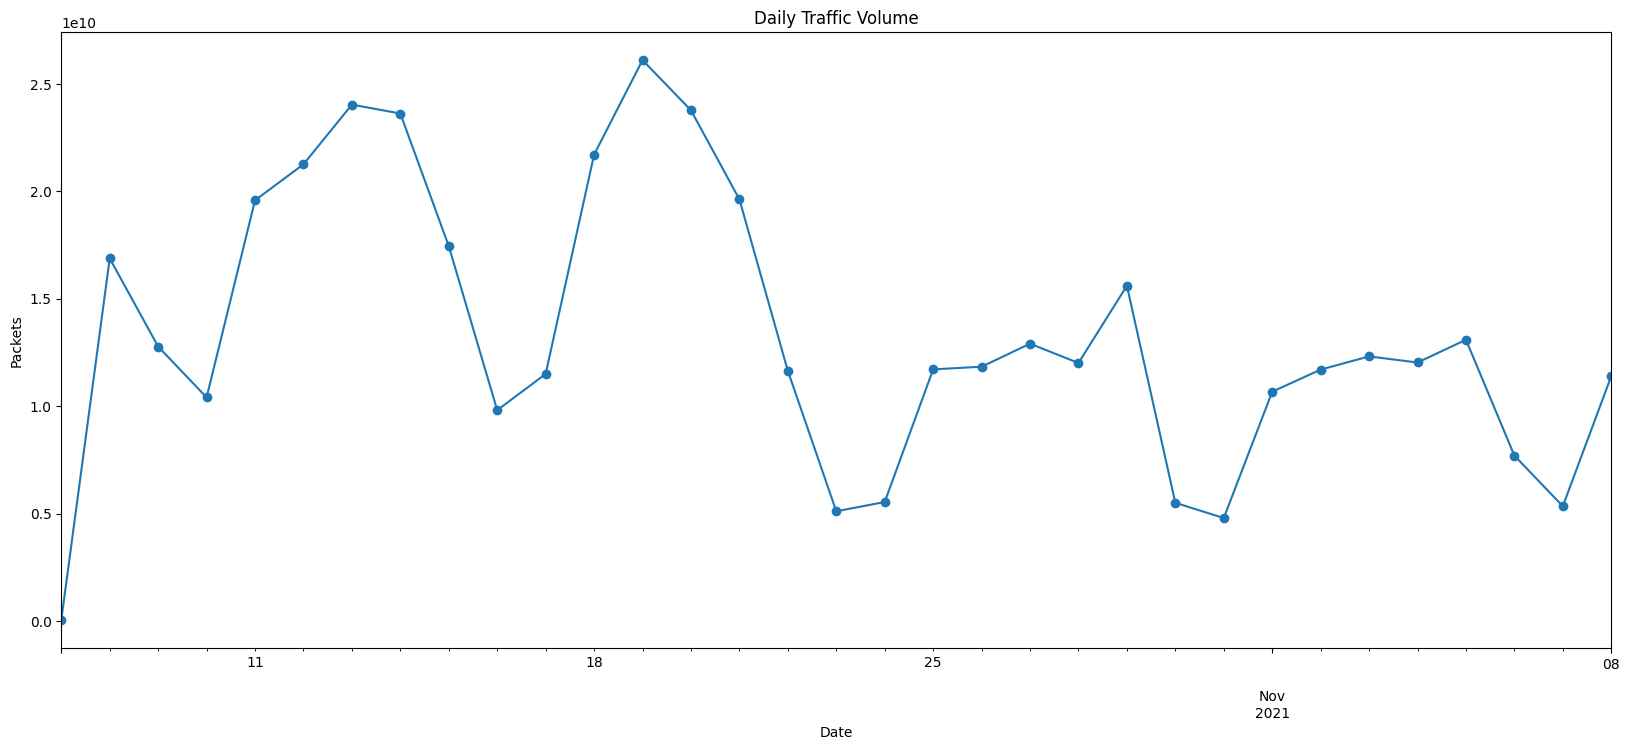

In [11]:

# Plot 1: Daily Traffic Volume
plt.figure(figsize=(20, 8))
df['in_packets'].resample('D').sum().plot(title='Daily Traffic Volume', marker='o')
plt.xlabel('Date')
plt.ylabel('Packets')
plt.show()

/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/885968225.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['in_packets'].resample('H').sum().plot(title='Hourly Traffic Volume')


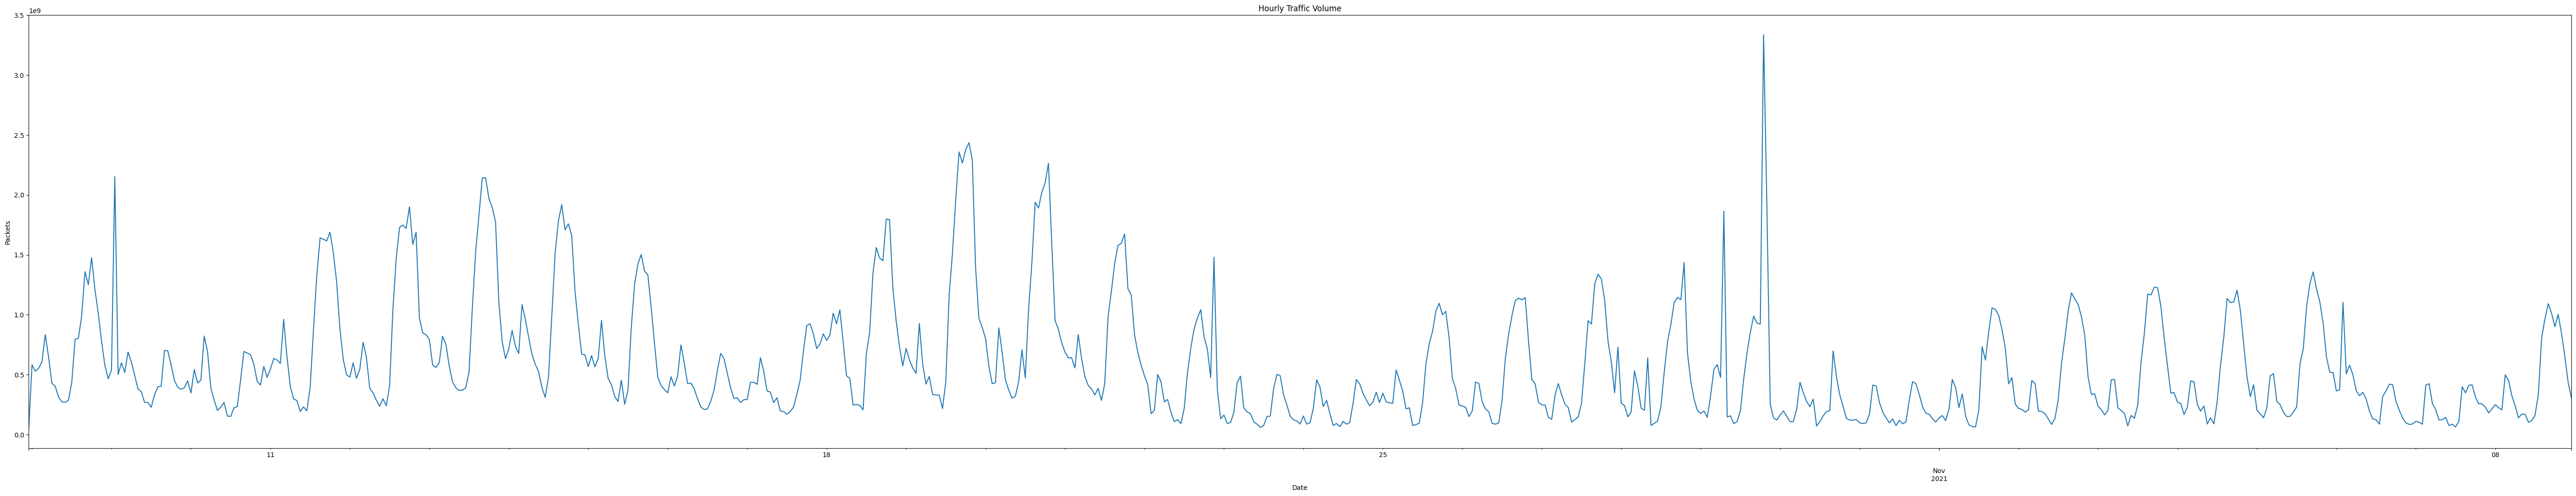

In [12]:
# Plot 2: Hourly Traffic Volume
plt.figure(figsize=(70, 12))
df['in_packets'].resample('H').sum().plot(title='Hourly Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Packets')
plt.show()

/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/3646413428.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['in_packets'].resample('H').sum().rolling(window=window_size).mean().plot(title='Rolling Mean of Hourly Traffic Volume (24-hour window)')


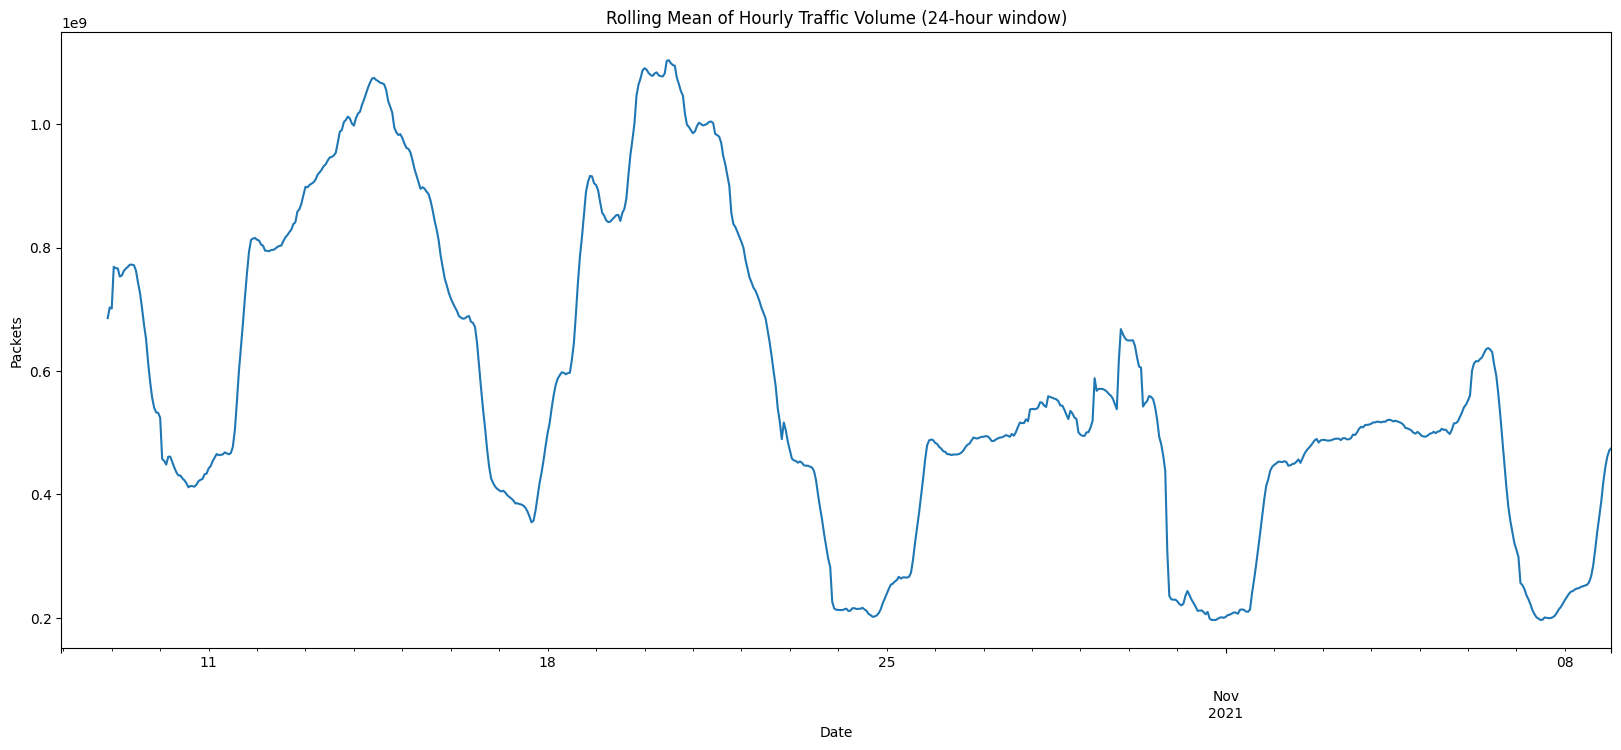

In [13]:
# Rolling Mean and Standard Deviation (with a window of 24 hours for daily patterns)
window_size = 24  # or adjust based on the granularity of your analysis

# Plot Rolling Mean
plt.figure(figsize=(20, 8))
df['in_packets'].resample('H').sum().rolling(window=window_size).mean().plot(title='Rolling Mean of Hourly Traffic Volume (24-hour window)')
plt.xlabel('Date')
plt.ylabel('Packets')
plt.show()


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/3157324868.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['in_packets'].resample('H').sum().rolling(window=window_size).std().plot(title='Rolling Std Dev of Hourly Traffic Volume (24-hour window)')


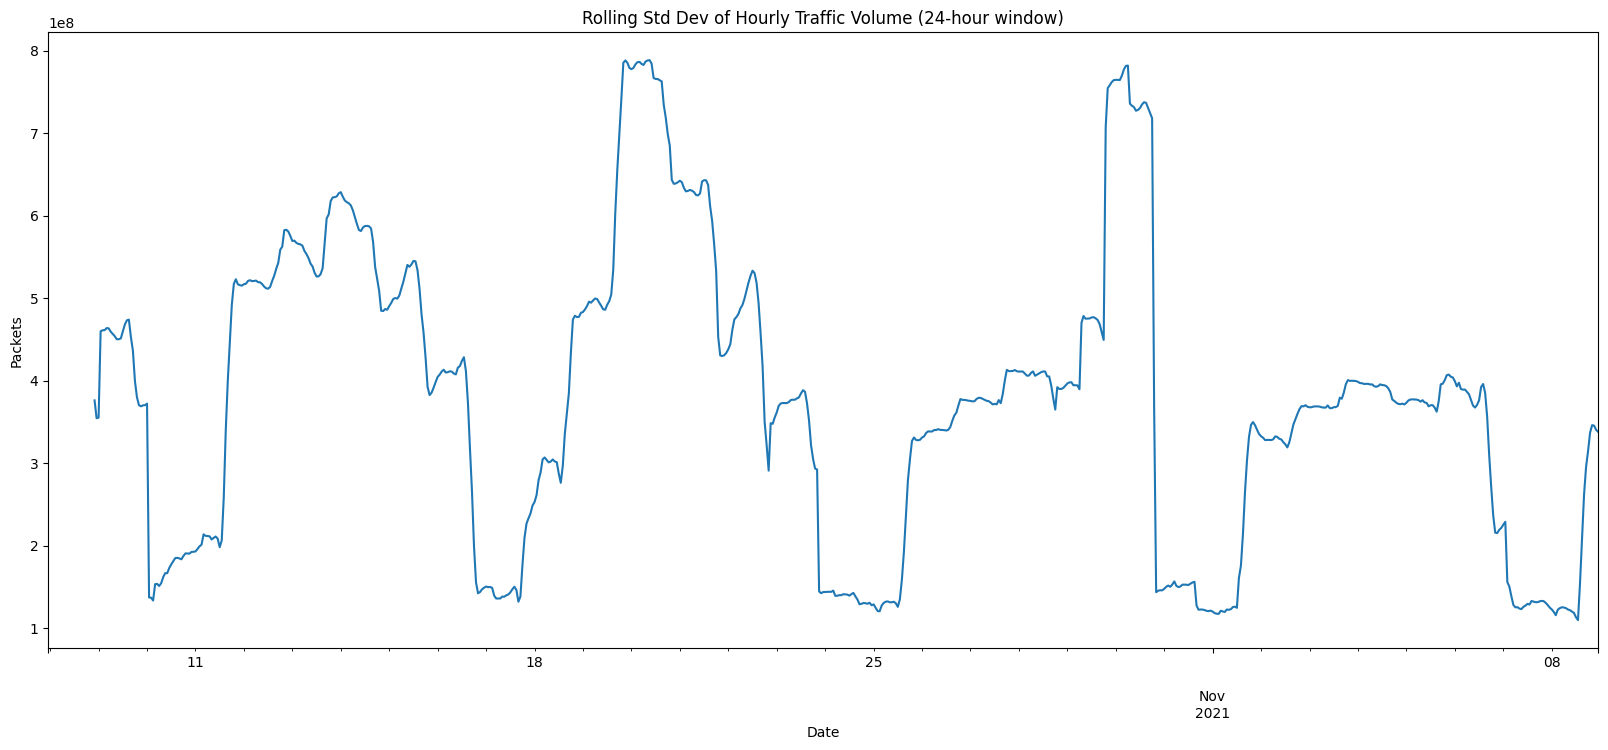

In [14]:
# Plot Rolling Standard Deviation
plt.figure(figsize=(20, 8))
df['in_packets'].resample('H').sum().rolling(window=window_size).std().plot(title='Rolling Std Dev of Hourly Traffic Volume (24-hour window)')
plt.xlabel('Date')
plt.ylabel('Packets')
plt.show()

In [29]:
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Resample data to daily traffic volume
daily_data = df['in_packets'].resample('D').sum()

# Scale the data for Isolation Forest
scaler = StandardScaler()

# Reshape data for scaling (scikit-learn expects 2D input)
X = daily_data.values.reshape(-1, 1)
X_scaled = scaler.fit_transform(X)

# Fit Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination to tune sensitivity
anomalies = clf.fit_predict(X_scaled)

# Convert anomaly results (-1 means anomaly) into a binary format (1 = anomaly, 0 = normal)
anomalies = np.where(anomalies == -1, 1, 0)

# Add anomaly column to the daily_data DataFrame
daily_data = daily_data.to_frame()  # Convert Series to DataFrame
daily_data['anomaly'] = anomalies



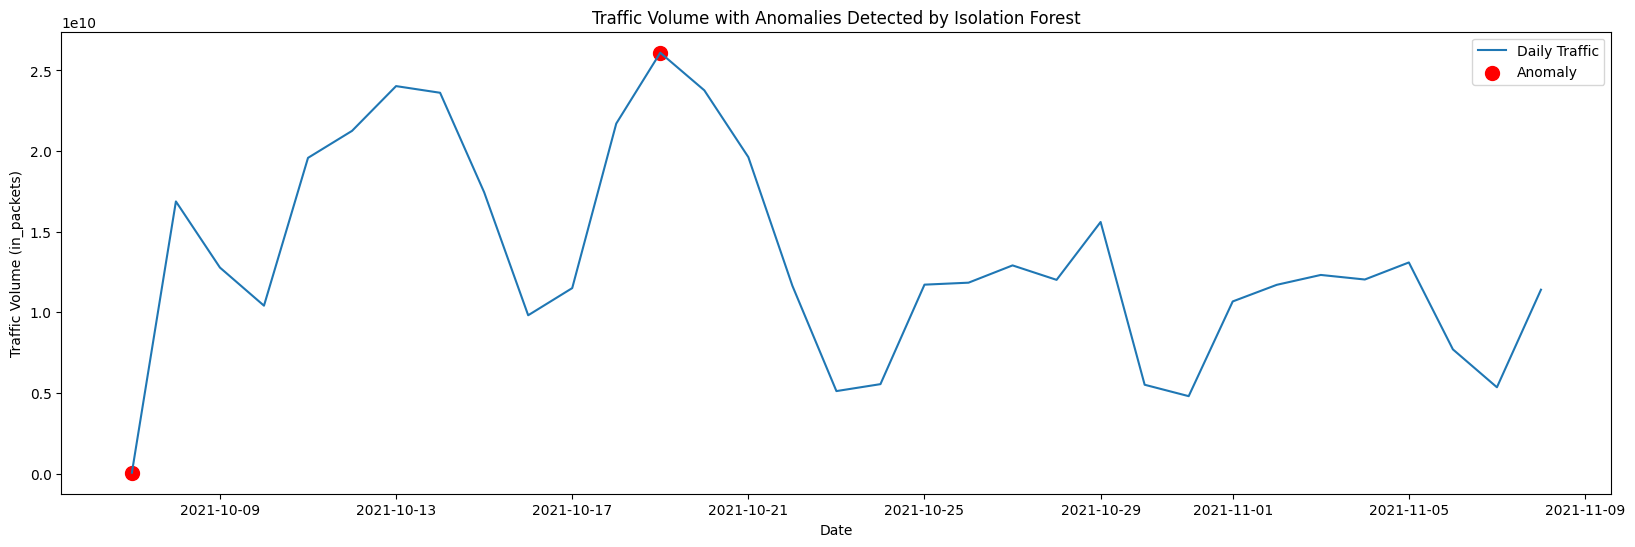

In [32]:
# Plot the anomalies on top of the daily traffic volume
plt.figure(figsize=(20, 6))
plt.plot(daily_data.index, daily_data['in_packets'], label='Daily Traffic')
plt.scatter(daily_data[daily_data['anomaly'] == 1].index, 
            daily_data[daily_data['anomaly'] == 1]['in_packets'], 
            color='red', label='Anomaly', marker='o', s=100)
plt.title('Traffic Volume with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Traffic Volume (in_packets)')
plt.legend()
plt.show()

In [35]:
# Resample data to hourly traffic volume
hourly_data = df['in_packets'].resample('H').sum()

# Scale the data for Isolation Forest
scaler = StandardScaler()

# Reshape data for scaling (scikit-learn expects 2D input)
X = hourly_data.values.reshape(-1, 1)
X_scaled = scaler.fit_transform(X)

# Fit Isolation Forest model
clf = IsolationForest(contamination=0.03, random_state=42)  # Adjust contamination to tune sensitivity
anomalies = clf.fit_predict(X_scaled)

# Convert anomaly results (-1 means anomaly) into a binary format (1 = anomaly, 0 = normal)
anomalies = np.where(anomalies == -1, 1, 0)

# Add anomaly column to the hourly_data DataFrame
hourly_data = hourly_data.to_frame()  # Convert Series to DataFrame
hourly_data['anomaly'] = anomalies

/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/1961313251.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['in_packets'].resample('H').sum()


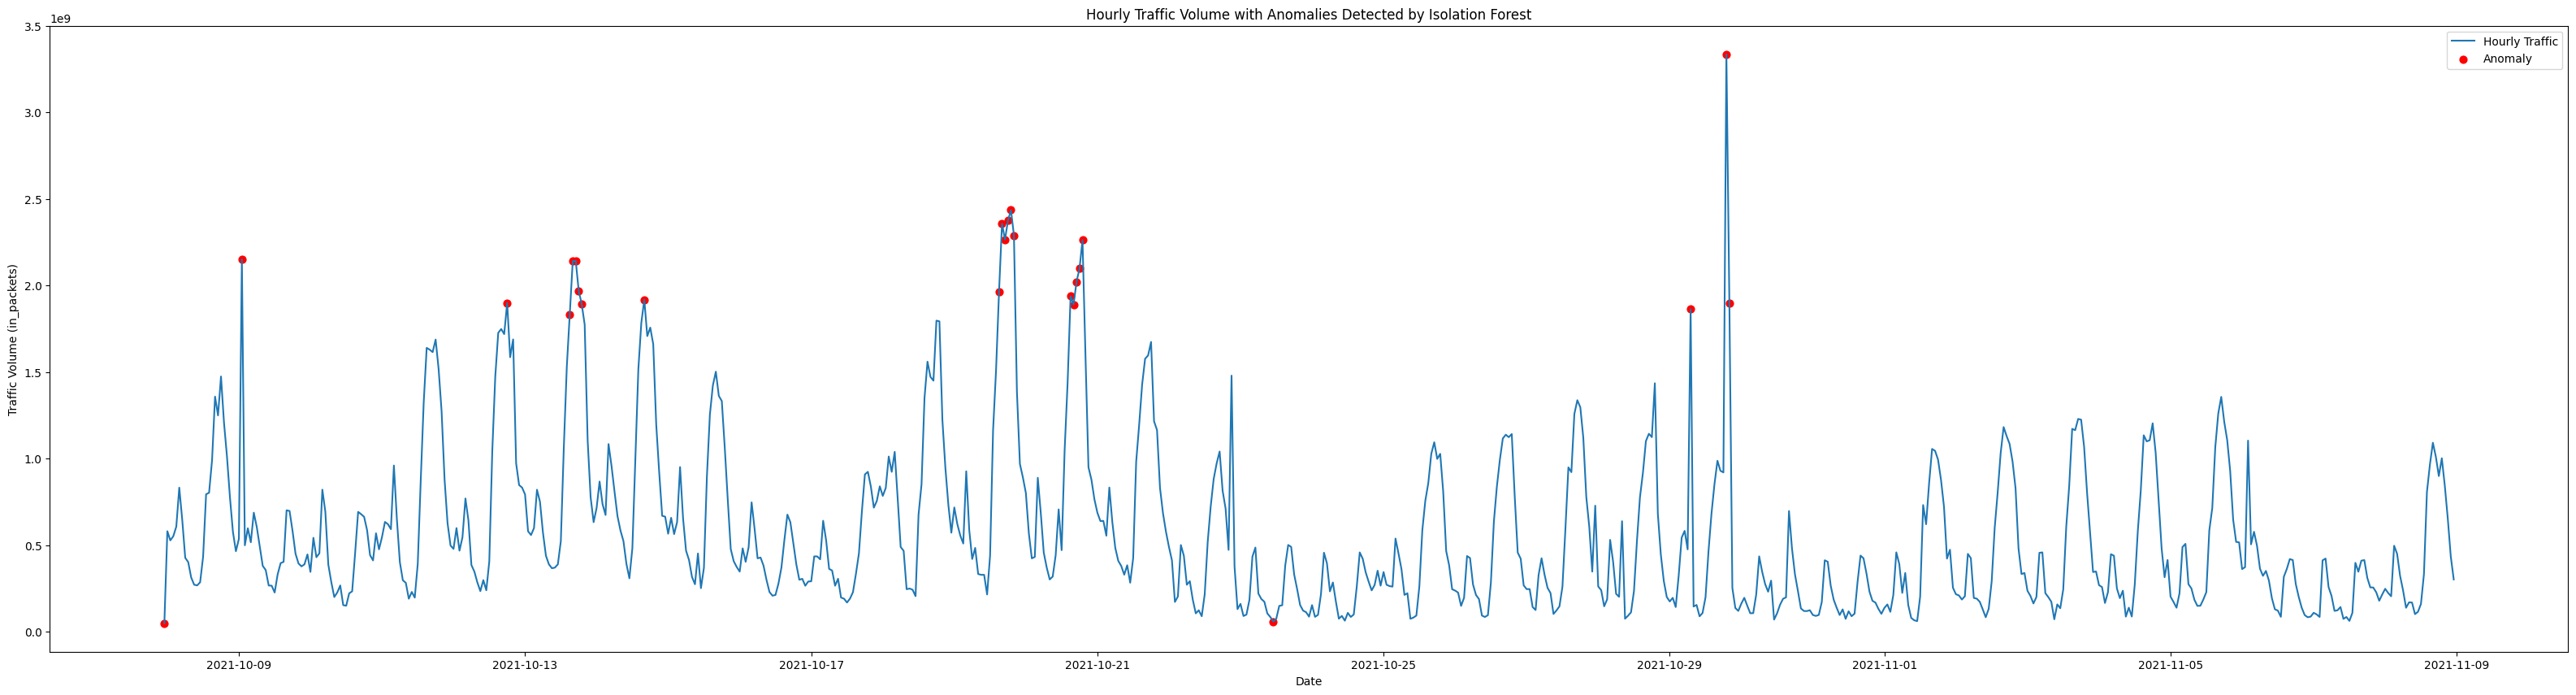

In [36]:
# Plot the anomalies on top of the hourly traffic volume
plt.figure(figsize=(40, 10))
plt.plot(hourly_data.index, hourly_data['in_packets'], label='Hourly Traffic')
plt.scatter(hourly_data[hourly_data['anomaly'] == 1].index, 
            hourly_data[hourly_data['anomaly'] == 1]['in_packets'], 
            color='red', label='Anomaly', marker='o', s=40)
plt.title('Hourly Traffic Volume with Anomalies Detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Traffic Volume (in_packets)')
plt.legend()
plt.show()

/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/2533076162.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['in_packets'].resample('H').sum()


ADF Statistic: -2.087089118627352
p-value: 0.24973772248740556
The time series is non-stationary.
ADF Statistic: -16.574764702518475
p-value: 1.8566307381873388e-29
The time series is stationary.
                               SARIMAX Results                                
Dep. Variable:             in_packets   No. Observations:                  768
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -15912.434
Date:                Sun, 08 Sep 2024   AIC                          31846.867
Time:                        22:53:31   BIC                          31897.935
Sample:                    10-08-2021   HQIC                         31866.524
                         - 11-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         

/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/2533076162.py:42: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(start=hourly_data.index[-1], periods=forecast_steps, freq='H'),


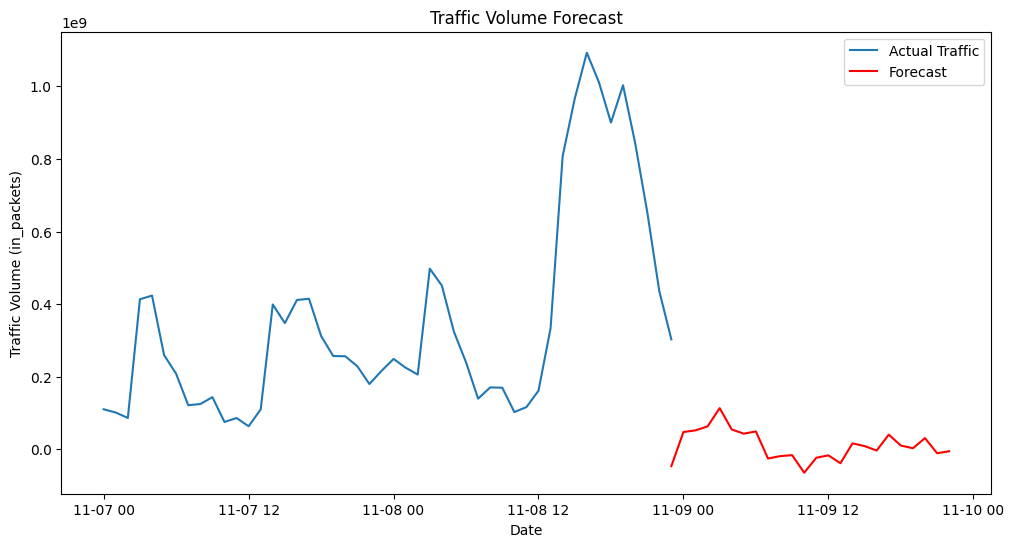

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Resample data to hourly traffic volume
hourly_data = df['in_packets'].resample('H').sum()

# Step 1: Check stationarity with the Augmented Dickey-Fuller test (ADF Test)
def check_stationarity(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("The time series is non-stationary.")
    else:
        print("The time series is stationary.")

check_stationarity(hourly_data)

# Step 2: Differencing the data if it's non-stationary
hourly_data_diff = hourly_data.diff().dropna()

# Check stationarity after differencing
check_stationarity(hourly_data_diff)

# Step 3: Fit the ARIMA model (p, d, q)
# Since we have differenced once, d=1. We'll try p=5, q=5 to start with.
model = ARIMA(hourly_data_diff, order=(5, 1, 5))  # Adjust the (p, d, q) values as needed
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Step 4: Forecast future traffic
forecast_steps = 24  # Forecast the next 24 hours (or more)
forecast = model_fit.forecast(steps=forecast_steps)

# Step 5: Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index[-48:], hourly_data[-48:], label='Actual Traffic')
plt.plot(pd.date_range(start=hourly_data.index[-1], periods=forecast_steps, freq='H'), 
         forecast, label='Forecast', color='red')
plt.title('Traffic Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Traffic Volume (in_packets)')
plt.legend()
plt.show()


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/2495056672.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['in_packets'].resample('H').sum().reset_index()
23:20:21 - cmdstanpy - INFO - Chain [1] start processing
23:20:23 - cmdstanpy - INFO - Chain [1] done processing
/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

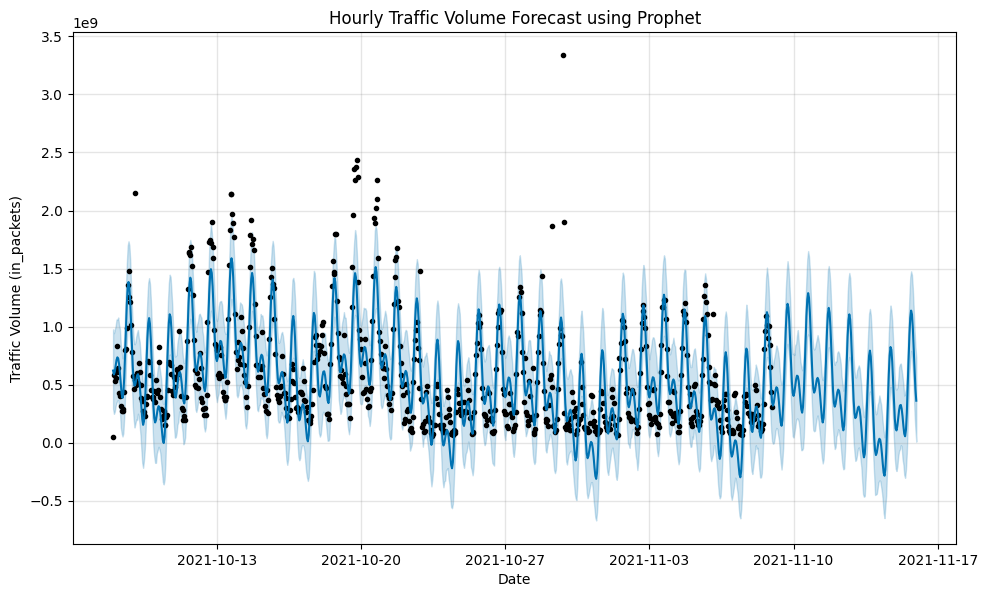

/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/Vs

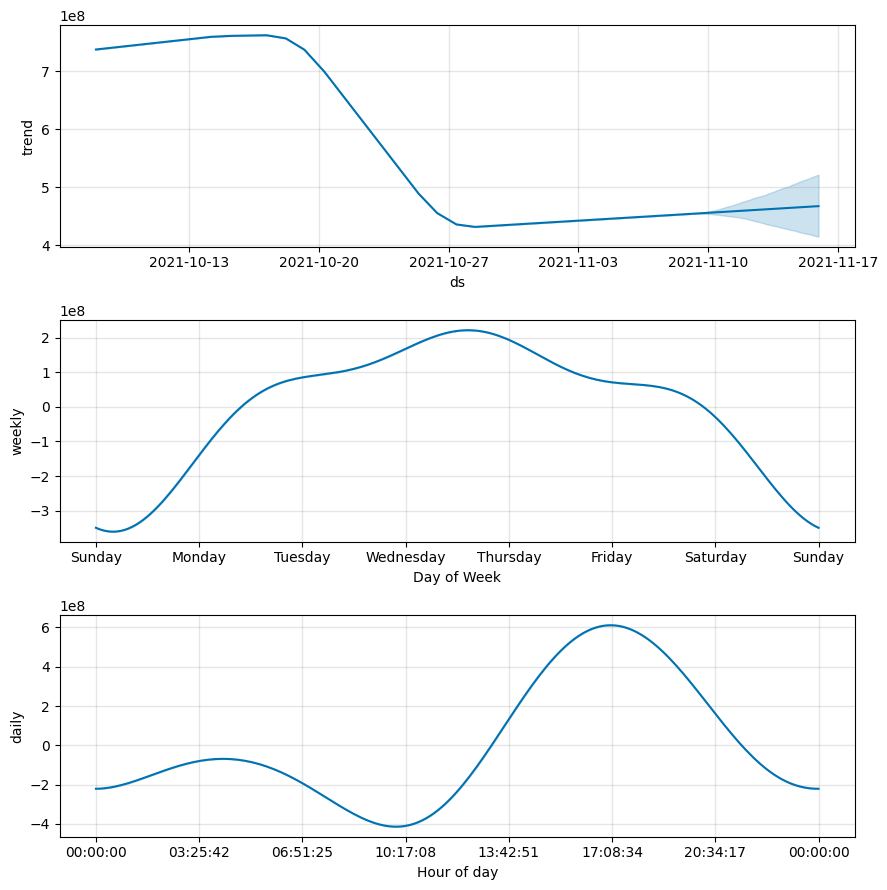

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Resample data to hourly traffic volume
hourly_data = df['in_packets'].resample('H').sum().reset_index()

# Prepare the data for Prophet
hourly_data = hourly_data.rename(columns={'t_first': 'ds', 'in_packets': 'y'})  # Prophet expects 'ds' and 'y' columns

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(hourly_data)

# Create a dataframe for future predictions (we'll forecast for the next 7 days)
future = model.make_future_dataframe(periods=24*7, freq='H')  # 7 days forecast at hourly intervals

# Predict future values
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Hourly Traffic Volume Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Traffic Volume (in_packets)')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


In [54]:
# Check the columns in the hourly_data dataframe
print(hourly_data.columns)

Index(['ds', 'y'], dtype='object')


In [57]:
# Ensure actual_values and predicted_values have the same length
min_length = min(len(actual_values), len(predicted_values))
actual_values = actual_values[:min_length]
predicted_values = predicted_values[:min_length]

# Calculate error metrics (MAE and RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 192107692.44478267
Root Mean Squared Error (RMSE): 272417145.03594816


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_39746/102759304.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['in_packets'].resample('H').sum().reset_index()
23:31:53 - cmdstanpy - INFO - Chain [1] start processing
23:31:53 - cmdstanpy - INFO - Chain [1] done processing
/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
/Users/maushariff/Downloads/Local_Disk_E/Byrav/Fall24 996 Reserach with Internet2 Data/VsCodeWorkspace/myenv/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the

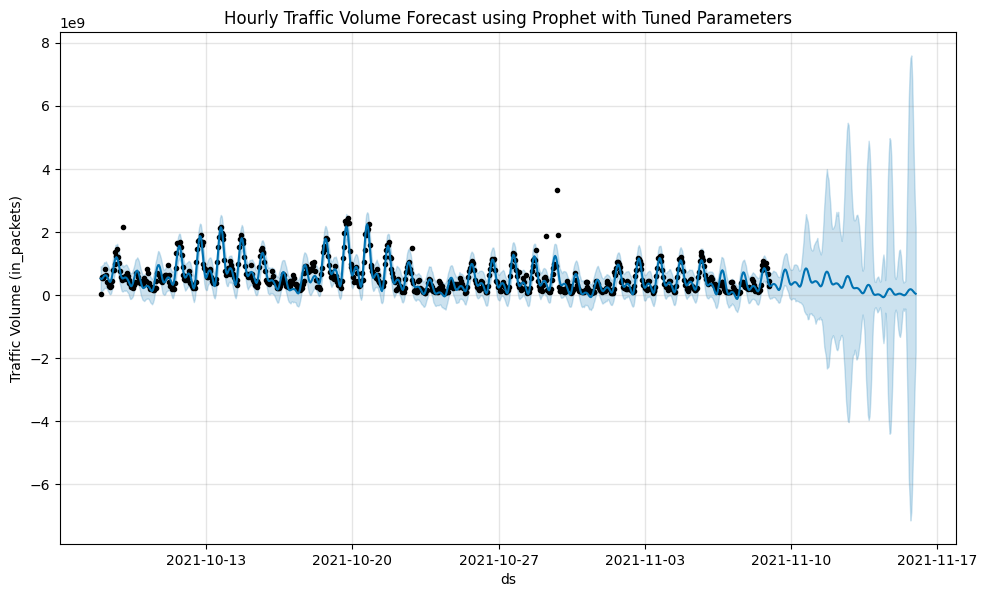

Mean Absolute Error (MAE): 136920231.5534793
Root Mean Squared Error (RMSE): 206608195.47115642


In [58]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Resample data to hourly traffic volume
hourly_data = df['in_packets'].resample('H').sum().reset_index()

# Prepare data for Prophet (ds for date, y for values)
df_prophet = hourly_data.rename(columns={'t_first': 'ds', 'in_packets': 'y'})

# Initialize Prophet model with tuned hyperparameters
prophet_model = Prophet(
    changepoint_prior_scale=0.5,    # Increase sensitivity to trend changes
    seasonality_mode='multiplicative',  # Use multiplicative seasonality (this may better suit your data)
    yearly_seasonality=False,      # You can experiment with this for yearly effects
    weekly_seasonality=True,       # Add weekly seasonality
    daily_seasonality=True,        # Add daily seasonality
    interval_width=0.95            # Confidence interval width
)

# Add seasonality components (optional, based on data)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
prophet_model.fit(df_prophet)

# Make future dataframe for forecasting
future = prophet_model.make_future_dataframe(periods=168, freq='H')  # 168 hours into the future (1 week)
forecast = prophet_model.predict(future)

# Plot the forecast
fig = prophet_model.plot(forecast)
plt.title('Hourly Traffic Volume Forecast using Prophet with Tuned Parameters')
plt.ylabel('Traffic Volume (in_packets)')
plt.show()

# Evaluate the model
predicted_values = forecast['yhat'].values[:len(df_prophet)]  # Align the predicted values with the actuals
actual_values = df_prophet['y'].values

# Calculate errors
mae = mean_absolute_error(actual_values, predicted_values)
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
